In [12]:
from torch import manual_seed
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch

In [13]:
# Reading the dataset
import pandas as pd

x_test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

<ipython-input-41-fe02af86613a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


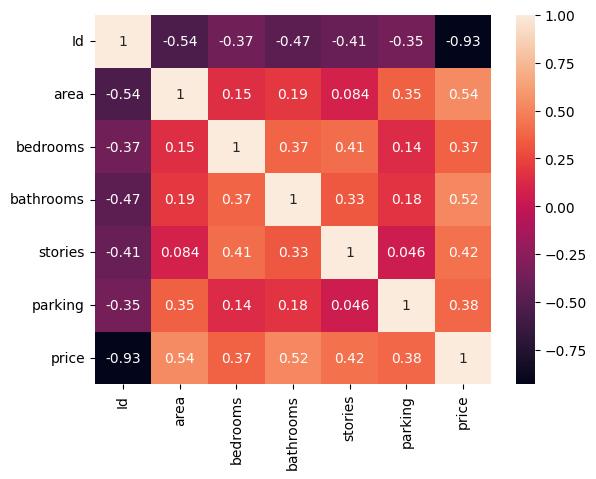

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt
corr = train.corr()
sns.heatmap(corr,annot=True)
plt.show()


In [15]:
print(train.shape,x_test.shape)

(545, 14) (70, 13)


# Pre-Procesing

In [16]:
y_train = train["price"]
x_train = train.drop('price',axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train.iloc[:,0:1] = scaler.fit_transform(x_train.iloc[:,0:1].values.reshape(-1,1))
x_test['area'] = scaler.fit_transform(x_test['area'].values.reshape(-1,1))


In [18]:
x_train.sample(5)

,Id,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
473,1.277588,8050,2,1,1,yes,no,no,no,no,0,no,unfurnished
360,0.559342,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
448,1.118684,4095,2,1,1,yes,no,no,no,no,2,no,semi-furnished
245,-0.171616,5360,3,1,2,yes,no,no,no,no,2,yes,unfurnished
230,-0.266959,5400,2,1,2,yes,no,no,no,no,0,yes,semi-furnished


In [19]:

x_train = pd.get_dummies(x_train, columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])
x_test = pd.get_dummies(x_test, columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus'])


In [20]:
x_test.sample(7)

,Id,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
62,538,-1.695026,3,1,2,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
52,528,-1.574792,2,1,1,0,1,0,1,0,...,1,1,0,1,0,1,0,0,1,0
49,525,-0.312331,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
16,492,-0.863995,2,1,1,1,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
25,501,-0.722543,3,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
45,521,3.609429,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
13,489,1.399240,4,1,3,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1


In [21]:
x_train = x_train.values
x_test = x_test.values

In [22]:
x_train

array([[-1.72887564e+00,  7.42000000e+03,  4.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.72251948e+00,  8.96000000e+03,  4.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.71616332e+00,  9.96000000e+03,  3.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.71616332e+00,  3.62000000e+03,  2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.72251948e+00,  2.91000000e+03,  3.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.72887564e+00,  3.85000000e+03,  3.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [23]:
y_train = y_train.values.reshape(-1,1)

# y_train = (y_train-np.min(y_train))/(np.max(y_train)-np.min(y_train))

y_train = torch.FloatTensor(y_train)

In [24]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [25]:
x_train

tensor([[-1.7289e+00,  7.4200e+03,  4.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.7225e+00,  8.9600e+03,  4.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.7162e+00,  9.9600e+03,  3.0000e+00,  ...,  0.0000e+00,
          1.0000e+00,  0.0000e+00],
        ...,
        [ 1.7162e+00,  3.6200e+03,  2.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 1.7225e+00,  2.9100e+03,  3.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.7289e+00,  3.8500e+03,  3.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  1.0000e+00]])

In [26]:

print(x_train.shape, x_test.shape, y_train.shape,sep='\n')


torch.Size([545, 21])
torch.Size([70, 21])
torch.Size([545, 1])


# NN and training

In [37]:
class NN_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(21, 12)
    self.linear2 = nn.Linear(12, 10)
    self.linear3 = nn.Linear(10, 1)

  def forward(self, x):
    x = nn.functional.relu(self.linear1(x))
    x = nn.functional.relu(self.linear2(x))
    x = self.linear3(x)
    return x


In [38]:
manual_seed(42)

regression_nn = NN_Model()

In [39]:
criterion = nn.MSELoss()
optimizer = optim.Adam(regression_nn.parameters(), lr=10)

In [ ]:
epochs = 1000

losses = []

for i in range(epochs):
  y_pred = regression_nn.forward(x_train)

  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if(i%5==0):
    print(f'loss:{loss}')


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Prediction

In [ ]:
y_pred = regression_nn.forward(x_test)

y_pred = y_pred.detach().numpy().reshape(1,-1).tolist()[0]
y_pred

In [ ]:
import pandas
df1 = pandas.DataFrame([test['Id'].values.tolist(),y_pred]).transpose()
df1.columns = ['Id','price']



In [ ]:
df1.to_csv('ans1.csv',index=False)
